K-Means

In [16]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

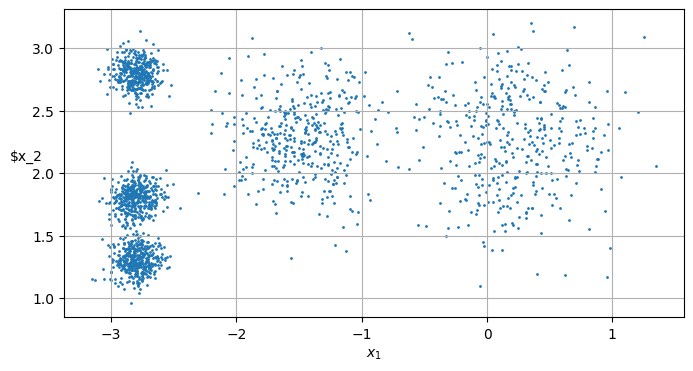

In [17]:
def plot_clusters(X,y=None):
  plt.scatter (X[:,0],X[:,1],c=y,s=1)
  plt.xlabel("$x_1$")
  plt.ylabel("$x_2",rotation=0)
plt.figure(figsize=(8,4))
plot_clusters(X)
plt.grid()
plt.show()


In [18]:
y_pred

array([0, 0, 4, ..., 3, 1, 0], dtype=int32)

In [19]:
kmeans.labels_

array([0, 0, 4, ..., 3, 1, 0], dtype=int32)

In [20]:
y_pred is kmeans.labels_

True

In [21]:

kmeans.cluster_centers_

array([[-2.80214068,  1.55162671],
       [ 0.08703534,  2.58438091],
       [-1.46869323,  2.28214236],
       [-2.79290307,  2.79641063],
       [ 0.31332823,  1.96822352]])

In [22]:
X_new=np.array([[0,2],[3,2],[-3,3],[-3,2.5]])
kmeans.predict(X_new)

array([4, 4, 3, 3], dtype=int32)

In [23]:
kmeans.transform(X_new).round(2)

array([[2.84, 0.59, 1.5 , 2.9 , 0.31],
       [5.82, 2.97, 4.48, 5.85, 2.69],
       [1.46, 3.11, 1.69, 0.29, 3.47],
       [0.97, 3.09, 1.55, 0.36, 3.36]])

# The K-Means Algorithm

In [24]:
kmeans.inertia_

219.42800073647606

# Mini-Batch K-means

In [25]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans=MiniBatchKMeans(n_clusters=5,n_init=3,random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, n_init=3, random_state=42)

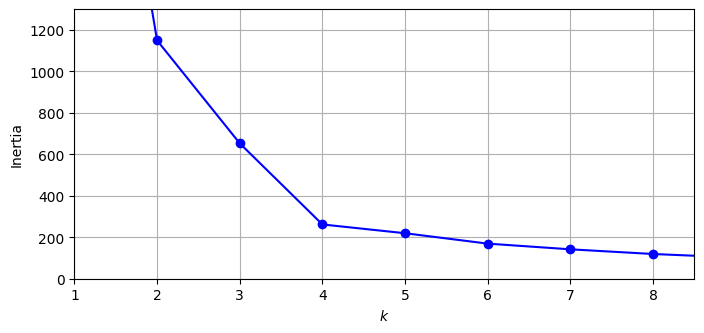

In [26]:
kmeans_per_k=[KMeans(n_clusters=k,n_init=10,random_state=42).fit(X)
              for k in range(1,10)]
inertias=[model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.axis([1, 8.5, 0, 1300])
plt.grid(True)
plt.show()

In [27]:
from sklearn.metrics import silhouette_score

In [28]:
silhouette_score(X,kmeans.labels_)

np.float64(0.6353422668284152)

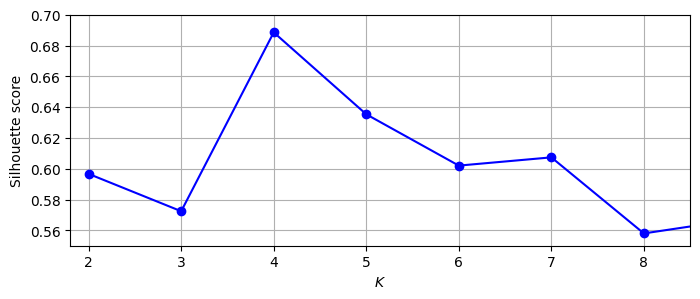

In [29]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$K$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()
plt.show()


In [30]:
import PIL

image=np.asarray(PIL.Image.open ("/content/WhatsApp Image 2024-07-31 at 16.33.43.jpeg"))
image.shape

(533, 800, 3)

In [31]:
X=image.reshape(-1,3)
kmeans=KMeans(n_clusters=8,n_init=10,random_state=42).fit(X)
segmented_img=kmeans.cluster_centers_[kmeans.labels_]
segmented_img=segmented_img.reshape(image.shape)

In [32]:
kmeans.cluster_centers_

array([[250.32078488, 237.62122506,   5.33955281],
       [ 15.51899427,  58.74475758,   1.81827299],
       [ 90.6014646 , 131.5303106 ,  32.08230184],
       [  2.72111953,  20.31068359,   0.64717933],
       [153.10994969, 160.8921185 ,  96.64661822],
       [ 48.27687304,  93.85189753,   8.54028992],
       [221.09885954, 183.07805945,   9.81126278],
       [195.16003034,  43.90102389,   8.66439135]])

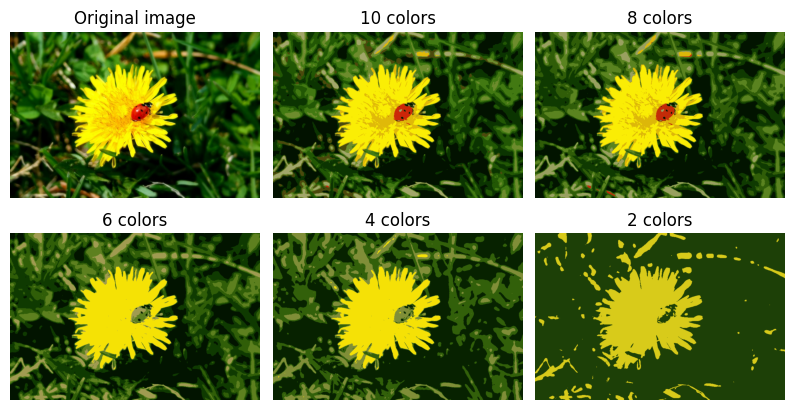

In [33]:
segmented_imgs=[]
X=image.reshape(-1,3)
n_colors=(10,8,6,4,2)
for n_clusters in n_colors:
  kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42).fit(X)
  segmented_img = kmeans.cluster_centers_[kmeans.labels_]
  segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')
for idx,n_clusters in enumerate(n_colors):
  plt.subplot(2,3,2+ idx)
  plt.imshow(segmented_imgs[idx]/255)
  plt.title(f"{n_clusters} colors")
  plt.axis("off")
plt.show()

In [34]:
from sklearn.datasets import load_digits

X_digits,y_digits=load_digits(return_X_y=True)
X_train,y_train =X_digits[:1400],y_digits[:1400]
X_test,y_test=X_digits[1400:],y_digits[1400:]

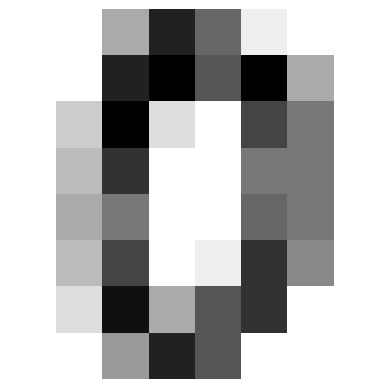

In [35]:
plt.imshow(X_train[0].reshape(8,8),cmap="binary")
plt.axis("off")
plt.show()

In [36]:

from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [37]:
log_reg.score(X_test,y_test)

0.7581863979848866

In [38]:
k=50
kmeans=KMeans(n_clusters=k,n_init=10,random_state=42)
X_digits_dist=kmeans.fit_transform(X_train)
representative_digit_idx=X_digits_dist.argmin(axis=0)
X_representative_digits=X_train[representative_digit_idx]

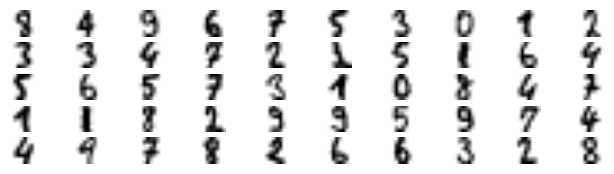

In [39]:
plt.figure(figsize=(8,2))
for index,X_representative_digit in enumerate(X_representative_digits):
  plt.subplot(k// 10,10,index+1)
  plt.imshow(X_representative_digit.reshape(8,8),cmap="binary",
             interpolation="bilinear")
  plt.axis('off')
plt.show()

In [40]:
y_representative_digits = np.array([
8,4,9,6,7,5,3,0,1,2,
3,3,4,7,2,1,5,1,6,4,
5,6,5,7,3,1,0,8,4,7,
1,1,8,2,9,9,5,9,7,4,
4,9,7,8,2,6,6,3,2,8
])

In [41]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8387909319899244

In [42]:
y_train_poropagated=np.empty(len(X_train))
for i in range(k):
  y_train_poropagated[kmeans.labels_ == i]=y_representative_digits[i]

In [43]:
log_reg=LogisticRegression(max_iter=10_000)
log_reg.fit(X_train,y_train_poropagated)
log_reg.score(X_test,y_test)

0.8589420654911839

In [44]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [45]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train_propagated)


LogisticRegression(max_iter=10000)

In [46]:

log_reg.score(X_test, y_test)

0.8589420654911839

In [47]:

percentile_closest = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [48]:

log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.8564231738035264

# DBSCAN

In [49]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X,y= make_moons(n_samples=1000,noise=0.05,random_state=42)
dbscan=DBSCAN(eps=0.05,min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [50]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [51]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [52]:
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_,dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [54]:
X_new=np.array([[-0.5,0],[0,0.5],[1,-0.1],[2,1]])
knn.predict(X_new)

array([6, 0, 3, 2])

In [55]:
knn.predict_proba(X_new)

array([[0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.76],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.3 , 0.7 , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ]])

# Gaussian Mixtures

In [56]:
X1,y1=make_blobs(n_samples=1000,centers=((4,-4),(0,0)),random_state=42)
X1=X1.dot(np.array([[0.374,0.95],[0.732,0.598]]))
X2,y2=make_blobs(n_samples=250,centers=1,random_state=42)
X2=X2+[6,-8]
X=np.r_[X1,X2]
y=np.r_[y1,y2]

In [57]:
from sklearn.mixture import GaussianMixture

In [58]:
gm=GaussianMixture(n_components=3,n_init=10,random_state=42)
gm.fit(X)


GaussianMixture(n_components=3, n_init=10, random_state=42)

In [59]:
gm.weights_

array([0.40005972, 0.20961444, 0.39032584])

In [60]:
gm.means_

array([[-1.40764129,  1.42712848],
       [ 3.39947665,  1.05931088],
       [ 0.05145113,  0.07534576]])

# Cluster the Olivetti Faces Datasets

In [61]:
from sklearn.datasets import fetch_olivetti_faces
olivetti=fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [62]:

print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

In [63]:

olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [64]:
from sklearn.model_selection import StratifiedShuffleSplit
strat_split=StratifiedShuffleSplit(n_splits=1,test_size=40,random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data,
                                                   olivetti.target))

X_train_valid=olivetti.data[train_valid_idx]
y_train_valid=olivetti.target[train_valid_idx]
X_test=olivetti.data[test_idx]
y_test=olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [65]:

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


In [66]:
from sklearn.decomposition import PCA
pca=PCA(0.99)
X_train_pca=pca.fit_transform(X_train)
X_valid_pca=pca.transform(X_valid)
X_test_pca=pca.transform(X_test)
pca.n_components_

np.int64(199)

In [67]:
from sklearn.cluster import KMeans

k_range=range(5,150,5)
kmeans_per_k=[]
for k in k_range:
    print(f"k={k}")
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=42)
    kmeans.fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


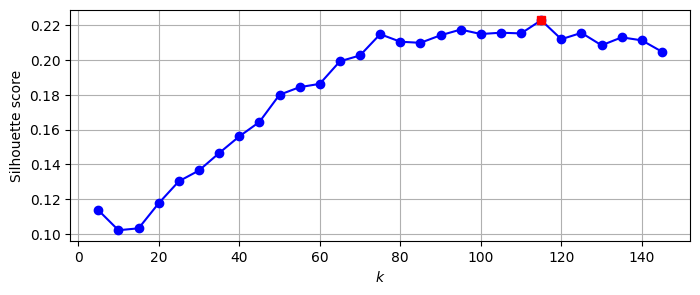

In [68]:
from sklearn.metrics import  silhouette_score
silhouette_scores=[silhouette_score(X_train_pca,model.labels_)
                   for model in kmeans_per_k]
best_index=np.argmax(silhouette_scores)
best_k=k_range[best_index]
best_score=silhouette_scores[best_index]

plt.figure(figsize=(8,3))
plt.plot(k_range,silhouette_scores,"bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.plot(best_k,best_score,"rs")
plt.grid()
plt.show()

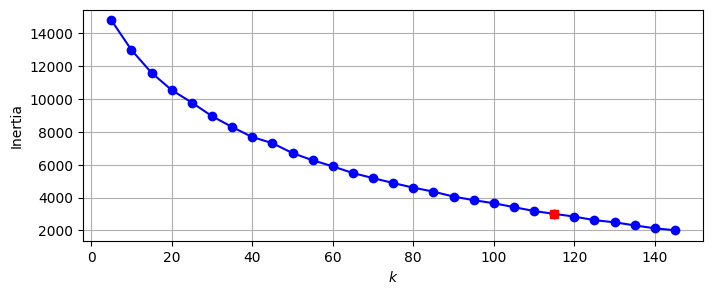

In [69]:
inertias=[model.inertia_ for model in kmeans_per_k]
best_inertia=inertias[best_index]
plt.figure(figsize=(8,3))
plt.plot(k_range,inertias,"bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.plot(best_k,best_inertia,"rs")
plt.grid()
plt.show()


In [70]:

best_model = kmeans_per_k[best_index]


Cluster 0


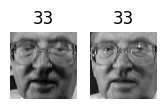

Cluster 1


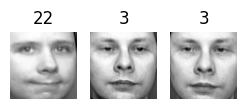

Cluster 2


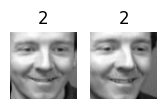

Cluster 3


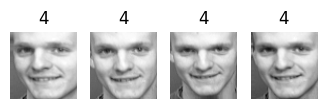

Cluster 4


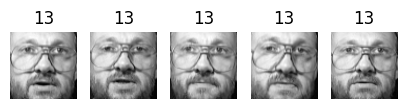

Cluster 5


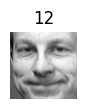

Cluster 6


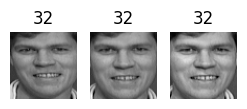

Cluster 7


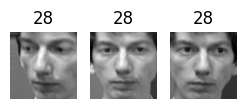

Cluster 8


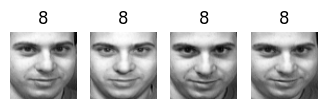

Cluster 9


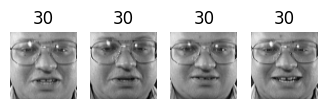

Cluster 10


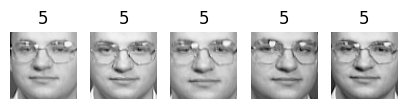

Cluster 11


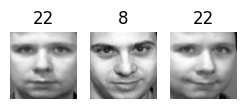

Cluster 12


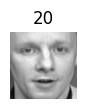

Cluster 13


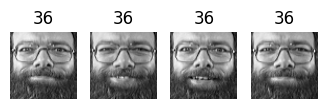

Cluster 14


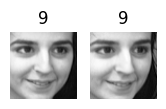

Cluster 15


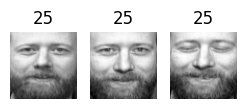

Cluster 16


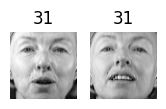

Cluster 17


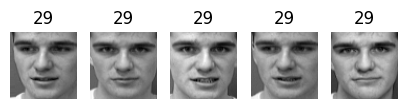

Cluster 18


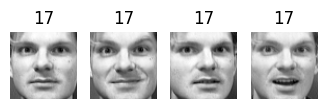

Cluster 19


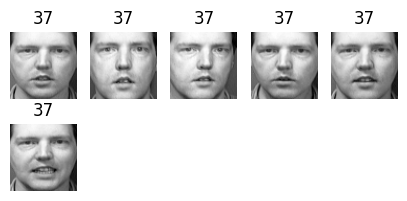

Cluster 20


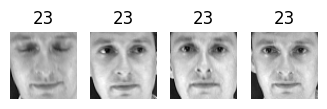

Cluster 21


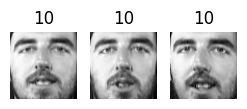

Cluster 22


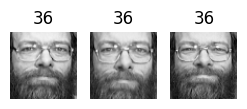

Cluster 23


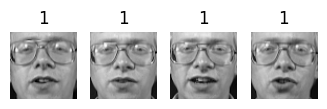

Cluster 24


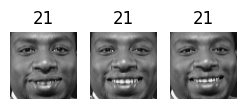

Cluster 25


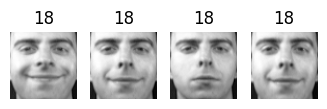

Cluster 26


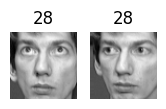

Cluster 27


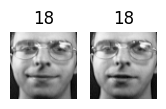

Cluster 28


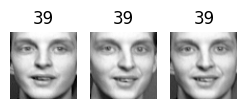

Cluster 29


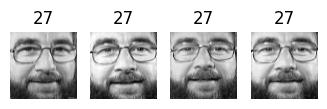

Cluster 30


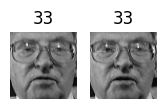

Cluster 31


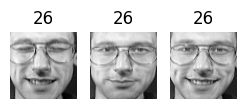

Cluster 32


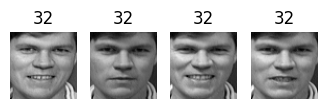

Cluster 33


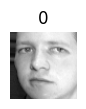

Cluster 34


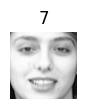

Cluster 35


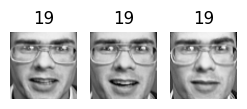

Cluster 36


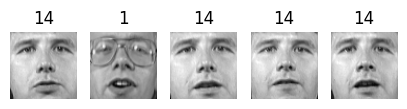

Cluster 37


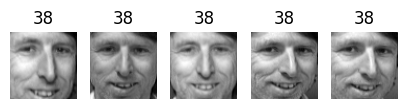

Cluster 38


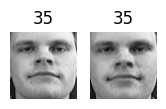

Cluster 39


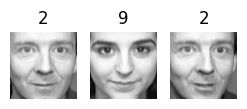

Cluster 40


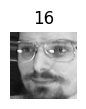

Cluster 41


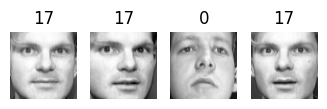

Cluster 42


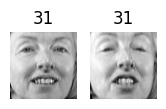

Cluster 43


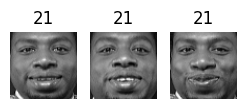

Cluster 44


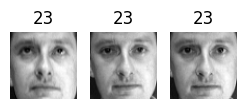

Cluster 45


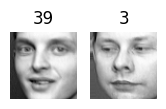

Cluster 46


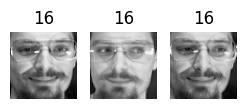

Cluster 47


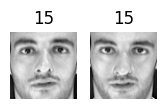

Cluster 48


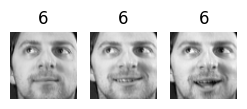

Cluster 49


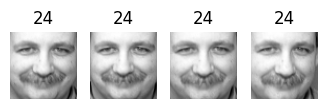

Cluster 50


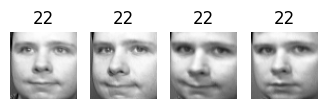

Cluster 51


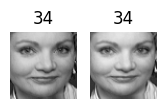

Cluster 52


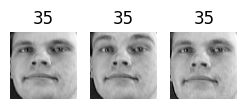

Cluster 53


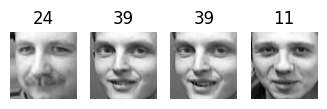

Cluster 54


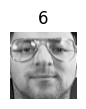

Cluster 55


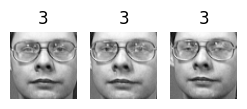

Cluster 56


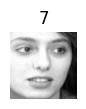

Cluster 57


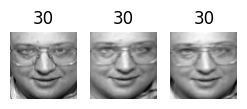

Cluster 58


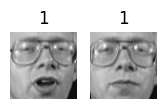

Cluster 59


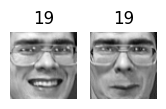

Cluster 60


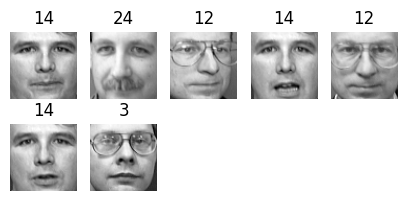

Cluster 61


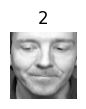

Cluster 62


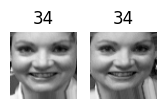

Cluster 63


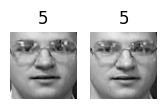

Cluster 64


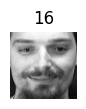

Cluster 65


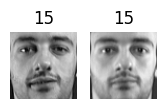

Cluster 66


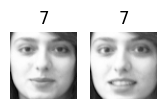

Cluster 67


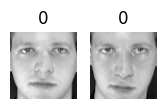

Cluster 68


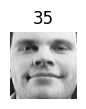

Cluster 69


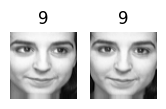

Cluster 70


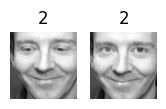

Cluster 71


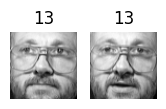

Cluster 72


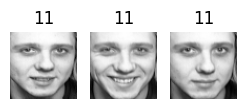

Cluster 73


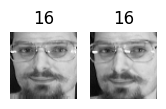

Cluster 74


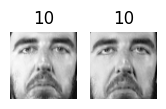

Cluster 75


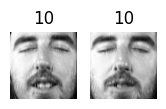

Cluster 76


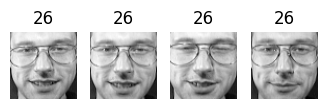

Cluster 77


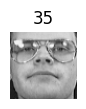

Cluster 78


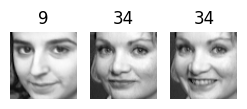

Cluster 79


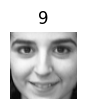

Cluster 80


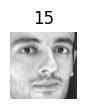

Cluster 81


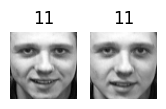

Cluster 82


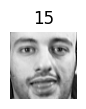

Cluster 83


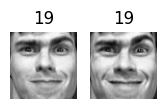

Cluster 84


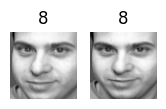

Cluster 85


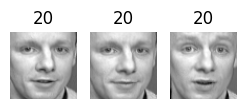

Cluster 86


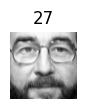

Cluster 87


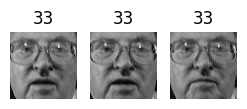

Cluster 88


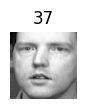

Cluster 89


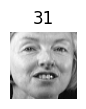

Cluster 90


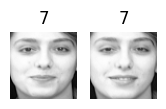

Cluster 91


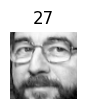

Cluster 92


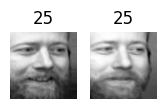

Cluster 93


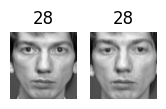

Cluster 94


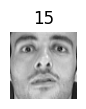

Cluster 95


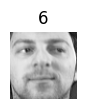

Cluster 96


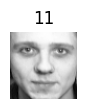

Cluster 97


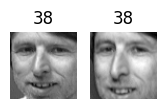

Cluster 98


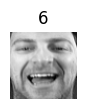

Cluster 99


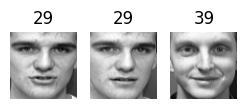

Cluster 100


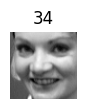

Cluster 101


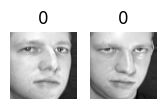

Cluster 102


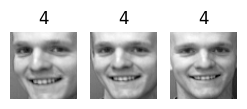

Cluster 103


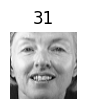

Cluster 104


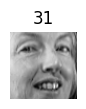

Cluster 105


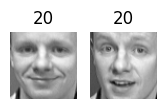

Cluster 106


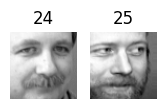

Cluster 107


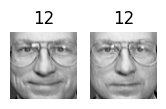

Cluster 108


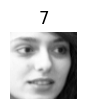

Cluster 109


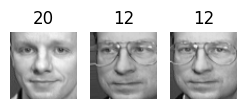

Cluster 110


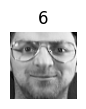

Cluster 111


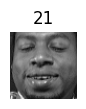

Cluster 112


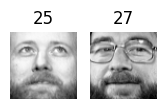

Cluster 113


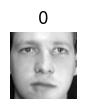

Cluster 114


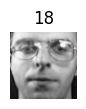

In [71]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

# Using Clustering as Preprocessing for Classification

In [72]:
from sklearn.ensemble import  RandomForestClassifier
clf=RandomForestClassifier(n_estimators=150,random_state=42)
clf.fit(X_train_pca,y_train)
clf.score(X_valid_pca,y_valid)

0.9375

In [73]:

X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)

clf.score(X_valid_reduced, y_valid)

0.7125

In [74]:

from sklearn.pipeline import make_pipeline

for n_clusters in k_range:
    pipeline = make_pipeline(
        KMeans(n_clusters=n_clusters, n_init=10, random_state=42),
        RandomForestClassifier(n_estimators=150, random_state=42)
    )
    pipeline.fit(X_train_pca, y_train)
    print(n_clusters, pipeline.score(X_valid_pca, y_valid))

5 0.3875
10 0.4875
15 0.5875
20 0.6125
25 0.6375
30 0.6125
35 0.7125
40 0.6875
45 0.7375
50 0.725
55 0.725
60 0.725
65 0.7
70 0.7125
75 0.7375
80 0.7625
85 0.7
90 0.75
95 0.75
100 0.75
105 0.7625
110 0.75
115 0.7125
120 0.7875
125 0.7625
130 0.75
135 0.7625
140 0.7125
145 0.725


In [75]:

X_train_extended = np.c_[X_train_pca, X_train_reduced]
X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
X_test_extended = np.c_[X_test_pca, X_test_reduced]

In [76]:

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_extended, y_train)
clf.score(X_valid_extended, y_valid)

0.8

# A Gaussian Mixture Model for the Olivetti Faces Dataset

In [77]:
from sklearn.mixture import   GaussianMixture

gm=GaussianMixture(n_components=40,random_state=42)
y_pred=gm.fit_predict(X_train_pca)

In [78]:
n_gen_faces=20
gen_faces_reduced,y_gen_faces=gm.sample(n_samples=n_gen_faces)
gen_faces=pca.inverse_transform(gen_faces_reduced)

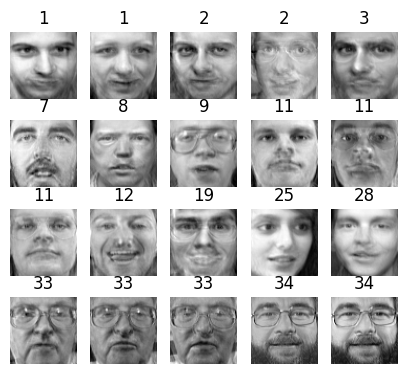

In [79]:
plot_faces(gen_faces,y_gen_faces)